In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("delivery_time.csv")

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
data=data.rename({"Delivery Time":"deliv_time","Sorting Time":"sort_time"},axis=1)

In [11]:
data

,deliv_time,sort_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [54]:
data.max()

deliv_time    29.0
sort_time     10.0
dtype: float64

In [55]:
data.min()

deliv_time    8.0
sort_time     2.0
dtype: float64

C:\Users\Parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

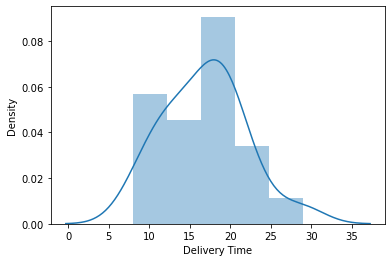

In [122]:
sns.distplot(data["Delivery Time"])

C:\Users\Parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

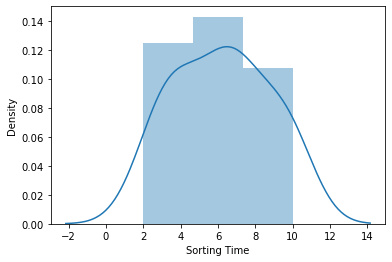

In [123]:
sns.distplot(data["Sorting Time"])

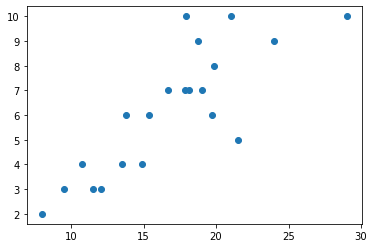

In [14]:
plt.scatter("deliv_time","sort_time",data=data)
plt.show()

In [124]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sort_time', ylabel='deliv_time'>

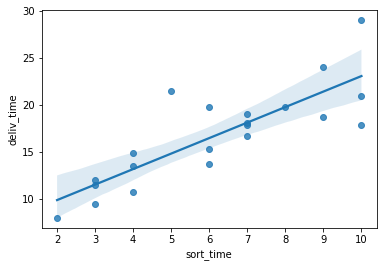

In [15]:
sns.regplot('sort_time','deliv_time',data=data)

### making model

In [16]:
model=smf.ols("deliv_time~sort_time",data=data).fit()

In [17]:
model

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             deliv_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        11:30:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sort_time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.params

Intercept    6.582734
sort_time    1.649020
dtype: float64

In [20]:
# t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept    3.823349
sort_time    6.387447
dtype: float64 
 Intercept    0.001147
sort_time    0.000004
dtype: float64


In [21]:
# R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [28]:
# sqrt vaqlues
np.sqrt(model.rsquared)

0.8259972607955326

#### using log

In [34]:
model2 = smf.ols("np.log(deliv_time)~np.log(sort_time)",data = data).fit()
model2

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             deliv_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        12:11:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sort_time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)  

Intercept            1.741987
np.log(sort_time)    0.597522
dtype: float64 

 Intercept            13.085552
np.log(sort_time)     8.024484
dtype: float64 

 Intercept            5.921137e-11
np.log(sort_time)    1.601539e-07
dtype: float64


In [37]:
model2.rsquared,model2.rsquared_adj

(0.77216134926874, 0.7601698413355158)

### by squaring

In [43]:
model3 = smf.ols("deliv_time~np.square(sort_time)",data = data).fit()
model3

In [45]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             deliv_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.74e-05
Time:                        12:15:02   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               11.2372      1.196      9.399      0.000       8.735      13.740
np.square(sort_time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### using squre root

In [47]:
model4 = smf.ols("deliv_time~np.sqrt(sort_time)",data = data).fit()
model4

In [50]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             deliv_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           2.61e-06
Time:                        12:20:53   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sort_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)

Intercept            -2.518837
np.sqrt(sort_time)    7.936591
dtype: float64 

 Intercept            -0.840911
np.sqrt(sort_time)    6.592434
dtype: float64 

 Intercept             0.410857
np.sqrt(sort_time)    0.000003
dtype: float64


In [52]:
# R-squared values

model4.rsquared,model4.rsquared_adj

(0.6958062276308671, 0.6797960290851233)

# predictions

In [56]:
new_nums=pd.Series([15,2])

In [57]:
data_pred=pd.DataFrame(new_nums,columns=["sort_time"])

In [59]:
data_pred

,sort_time
0,15
1,2


In [62]:
model.predict(data_pred)

0    31.318032
1     9.880774
dtype: float64

In [63]:
predict1=model.predict(data)

In [64]:
predict1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [66]:
predict2=model2.predict(data)

In [67]:
predict2

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [68]:
predict3=model3.predict(data)

In [69]:
predict3

0     23.724217
1     13.235127
2     15.732529
3     21.351685
4     23.724217
5     15.732529
6     17.355841
7     12.361036
8     23.724217
9     21.351685
10    19.228893
11    13.235127
12    17.355841
13    12.361036
14    12.361036
15    13.235127
16    15.732529
17    17.355841
18    11.736686
19    17.355841
20    14.358958
dtype: float64

In [70]:
predict4=model4.predict(data)

In [71]:
predict4

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [78]:
data["predict1"]=predict1

data["predict2"]=predict2

data["predict3"]=predict3

data["predict4"]=predict4


In [79]:
data

,deliv_time,sort_time,predict1,predict2,predict3,predict4
0,21.00,10,23.072933,3.117833,23.724217,22.578867
1,13.50,4,13.178814,2.570329,13.235127,13.354345
2,19.75,6,16.476853,2.812603,15.732529,16.921761
3,24.00,9,21.423913,3.054878,21.351685,21.290936
4,29.00,10,23.072933,3.117833,23.724217,22.578867
5,15.35,6,16.476853,2.812603,15.732529,16.921761
6,19.00,7,18.125873,2.904712,17.355841,18.479409
7,9.50,3,11.529794,2.398432,12.361036,11.227742
8,17.90,10,23.072933,3.117833,23.724217,22.578867
9,18.75,9,21.423913,3.054878,21.351685,21.290936


#### predict1 = prediction of model with our original data

predict2 = prediction of log model with our original data

predict3 = prediction of sqaure model with our original data

predict4 = prediction of sqaure root model with our original data